In [13]:
import random
import numpy as np
import sys
import matplotlib.pyplot as plt
import random
import copy
from timeit import default_timer as timer

# Laberinto (No modificar)

In [14]:
# Inicializamos el mapa 
def inicializarMapa(mapa, P):
    for i in range(len(mapa)):
        for j in range(len(mapa[0])): 
            valor = random.uniform(0, 1) 
            if valor < P:
                mapa[i][j] = 1
#
def contarVecinosVivos(mapa, x, y):
    dimy = len(mapa)
    dimx = len(mapa[0])     
    contador = 0     
    for i in range(-1, 2):
        for j in range(-1, 2):             
            if (i == 0 and j == 0):
                pass 
            else:
                vecinox = x + i
                vecinoy = y + j 
                if (vecinox < 0 or vecinox >= dimx or vecinoy < 0 or vecinoy >= dimy):
                    contador += 1 
                else:
                    contador += mapa[vecinoy][vecinox] 
    #print(contador)
    return contador

In [15]:
def calcularPaso(mapa, lim_aislamiento, lim_nacimiento):
    dimy = len(mapa)
    dimx = len(mapa[0])
    mapa_aux = np.zeros((dimy, dimx), dtype = int)
    for x in range(dimx):
        for y in range(dimy):
            num_vecinos = contarVecinosVivos(mapa, x, y)
            if mapa[y][x] == 1: 
                if num_vecinos < lim_aislamiento:
                    mapa_aux[y][x] = 0
                else:
                    mapa_aux[y][x] = 1
            elif mapa[y][x] == 0: 
                if num_vecinos > lim_nacimiento:
                    mapa_aux[y][x] = 1
                else:
                    mapa_aux[y][x] = 0
    return mapa_aux

In [16]:
def dibujarMapa(mapa):
  plt.imshow(mapa)
  plt.colorbar()
  plt.show()

In [17]:
def floodFill(mapa, posy, posx, num_region):
    ysize = len(mapa)
    xsize = len(mapa[0])
    pila = set(((posy, posx),))
    area = 0
    while len(pila) > 0:
        y, x = pila.pop()
        area = area + 1
        if mapa[y][x] == 0:
            mapa[y][x] = num_region
            if y > 0:
                pila.add((y - 1, x))
            if y < (ysize - 1):
                pila.add((y + 1, x))
            if x > 0:
                pila.add((y, x - 1))
            if x < (xsize - 1):
                pila.add((y, x + 1))
    return area

In [18]:
def eliminarZonasAisladas(mapa):
    dimy = len(mapa)
    dimx = len(mapa[0])
    region = 2
    areas = []
    mapa_aux = np.copy(mapa)   
    for x in range(dimx):
        for y in range(dimy):
            if mapa_aux[y][x] == 0:
                areas.append(floodFill(mapa_aux, y, x, region))
                region = region + 1
    region_maxima = areas.index(max(areas)) + 2
    for x in range(dimx):
        for y in range(dimy):
            if mapa_aux[y][x] != 1 and mapa_aux[y][x] != region_maxima:
                mapa[y][x] = 1
    return mapa

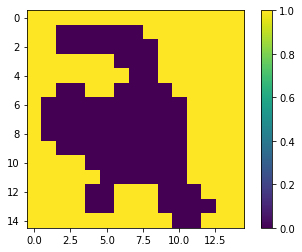

In [19]:
#dimx = max(int(input("Ancho del mapa: ")), 20)
#dimy = max(int(input("Alto del mapa: ")), 20)


dimx = 15
dimy = 15
#lim_aislamiento = int(input("Limite para aislamiento (recomendado 3): "))
lim_aislamiento = 3
#lim_nacimiento = int(input("Limite para nacimiento (recomendado 4): "))
lim_nacimiento = 4
#n = int(input("Num. de pasos para el automata celular (recomendado 5-6): "))
n = 5
#P = float(input("Probabilidad inicializar una casilla como viva (recomendado 0.4): "))
P = 0.4
mapa = np.zeros((dimy,dimx), dtype=int)
inicializarMapa(mapa, P)
for i in range(n):
    mapa = calcularPaso(mapa, lim_aislamiento, lim_nacimiento)
mapa = eliminarZonasAisladas(mapa)
dibujarMapa(mapa)

# Indicaciones generales
Al ejecutar la siguiente celda de código se generará de forma automática un laberinto (diferente en cada ejecución) y se presentará su imagen para mayor referencia.
 
Dicho laberinto se encuentra almacenado en la variable **"mapa"**, este mapa es el que usaran como base para la aplicación del algoritmo de búsqueda "Primero en Profundidad" y "Primero en Anchura".
 
Como podrán ver la variable mapa es una matriz de 0 y 1, en donde los 1's corresponden a las paredes y los 0's a los pasillos libres.
 
Con esta información se necesita un programa que encuentre una ruta entre una coordenada inicial $i$ y una final $j$.
 
Implemente los algoritmos de búsqueda no informada "Primero en profundidad" y "Primero en anchura" para encontrar un camino entre los puntos ingresados por el usuario.
 
Al final tome la solución encontrada por el programa y sustituya las coordenadas por un valor de **0** en la matriz que corresponda e imprima el mapa resultante.

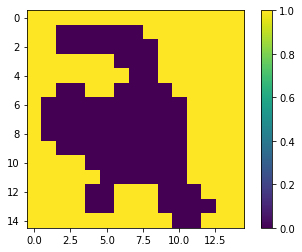

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 1 1 1 1 1 1]
 [1 1 0 0 1 1 0 0 0 0 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 0 0 0 0 0 1 1 1 1]
 [1 1 1 1 1 0 0 0 0 0 0 1 1 1 1]
 [1 1 1 1 0 0 1 1 1 0 0 0 1 1 1]
 [1 1 1 1 0 0 1 1 1 0 0 0 0 1 1]
 [1 1 1 1 1 1 1 1 1 1 0 0 1 1 1]]


In [20]:
dibujarMapa(mapa) #Usen esta función para imprimir el mapa
#Como pueden ver al imprimir la variable mapa que se generó, es una matriz de 0's y 1's
print(mapa)




# Primero en profundidad

In [21]:
#Definir inicio hasta que la cordenada este en una celda = 0
inicio= np.array([random.randrange(dimy),random.randrange(dimx)])
while (mapa[inicio[0],inicio[1]]==1):
  inicio= np.array([random.randrange(dimy),random.randrange(dimx)])
#Definir inicio hasta que la cordenada este en una celda = 0
fin=np.array([random.randrange(dimy),random.randrange(dimx)])
while (mapa[fin[0],fin[1]]==1):
  fin= np.array([random.randrange(dimy),random.randrange(dimx)])

inicio  [6 8]
fin  [3 8]
Profundidad máxima permitida: 20
solucion encontrada
El paso  19  es  [3 8]
El paso  18  es  [4 8]
El paso  17  es  [5 8]
El paso  16  es  [6 8]
El paso  15  es  [7 8]
El paso  14  es  [8 8]
El paso  13  es  [9 8]
El paso  12  es  [10  8]
El paso  11  es  [11  8]
El paso  10  es  [10  8]
El paso  9  es  [11  8]
El paso  8  es  [10  8]
El paso  7  es  [11  8]
El paso  6  es  [10  8]
El paso  5  es  [11  8]
El paso  4  es  [10  8]
El paso  3  es  [9 8]
El paso  2  es  [8 8]
El paso  1  es  [7 8]
El paso  0  es  [6 8]
El tiempo de ejecucion fue de 0.024070553999990807  Segundos 


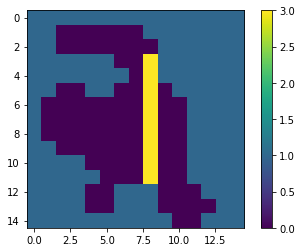

In [22]:
#Algoritmo de profundidad
def profundidad(map, cordenada):
  #agregamos el nuevo estado a la pila 
  pila.append(cordenada)
  #Se compara si es la solución
  if(cordenada == fin).all():
    return True
  else:
    #se verifica que la profundidad maxima no sea 
    if len(pila) < prof_max :
      #Verificamos si se puede hacer el movimiento y si hay camino en esa cordenada 
      if (cordenada[0]+1) < dimx and map[cordenada[0]+1,cordenada[1]]==0:
        #Si se cumple esa condición  entramos a la recursividad con la nueva cordenada para guardarla 
        if profundidad(map,np.array([cordenada[0]+1,cordenada[1]])):
          return True
      #verificamos si el movimiento no sale de la matriz  y si hay camino de esa cordenada 
      if (cordenada[0]-1)>=0 and map[cordenada[0]-1,cordenada[1]]==0:
        #si se cumple la condición hace el movimiento 
        if profundidad(map,np.array([cordenada[0]-1,cordenada[1]])):
          return True
      #verificamos si el movimiento se puee hacer y si hay camino de esa cordenada 
      if (cordenada[1]+1) < dimy and map[cordenada[0],cordenada[1]+1]==0:
        #ya  que vimos que si se puede hacer el movimiento, entramos a la recursividad con las nuevas cordenads 
        if profundidad(map,np.array([cordenada[0],cordenada[1]+1])):
          return True
      #verificamos que si se pueda hacer el movimiento 
      if cordenada[1]-1>=0 and map[cordenada[0],cordenada[1]-1]==0:
        #entramos a la recursividad con la nueva cordenada 
        if profundidad(map,np.array([cordenada[0],cordenada[1]-1])):
          return True
    pila.pop()
    return False
#Inicializamos la pila 
pila = [] #pila
# nos da el los valores de inicio del camino y el fin del mimo 
print("inicio ",inicio)
print("fin ",fin)
#Pedimos la profundidad deseada 
prof_max = int(input("Profundidad máxima permitida: "))
#Hacemos una copia del mapa para poder mostrar el resultado sin 
mapares=copy.deepcopy(mapa)
# Llamamos al metodo prfundidad pasandole el mapa y el incio
start=timer()
if profundidad(mapa,inicio):
  end =timer()
  print("solucion encontrada")
  #Vaciamos la pila para ver el camino que trazo 
  while(not pila == []):
    #se guarda el valor de la pila en un aux
    aux=pila.pop()
    #imprimimos el valor que son los pasos 
    print("El paso ",len(pila)," es ",aux)
    #dibujamos el resultado  en la copia cambiando el valor de las cordenadas que seleccionamos 
    mapares[aux[0],aux[1]]=3
else:
  end =timer()
  #en dado caso que no se encuentre la solución a esa profunidad 
  print("solución no encontrada")
  #vaiciamos la pila
  pila=[]
#dibujamos el mapa 

total = end-start
print("El tiempo de ejecucion fue de %s" %total," Segundos ")
dibujarMapa(mapares)
#print(mapares)

# Primero en anchura

cordenada de inicio  [6 8]
cordenada fin  [3 8]
El tiempo de ejecucion fue de 0.0008931869999742048  Segundos 
solucion encontrada
El paso  3  es  [3 8]
El paso  2  es  [4 8]
El paso  1  es  [5 8]
El paso  0  es  [6 8]


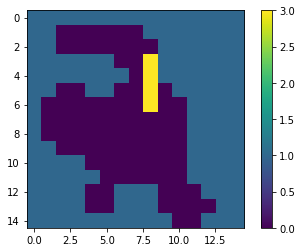

In [23]:
 
def anchura(cordenada, fin,pila):
  #print(bandera)
  if(cordenada == fin).all():
    #print("Hola kevin")
    return True
  else:
    #Verificamos si se puede hacer el movimiento y si hay camino en esa cordenada 
    if (cordenada[0]+1) < dimx and mapa[cordenada[0]+1,cordenada[1]]==0:
      #hacemos una copia de la pila 
      pilaaux=copy.copy(pila)
      #en la copia agregamos el nuevo estado 
      pilaaux.append(np.array([cordenada[0]+1,cordenada[1]]))
      #y agregamos la pila a la cola 
      cola.insert(0,pilaaux)
    #Verificamos si se puede hacer el movimiento y si hay camino en esa cordenada 
    if (cordenada[0]-1)>=0 and mapa[cordenada[0]-1,cordenada[1]]==0:
      #hacemos una copia de la pila
      pilaaux=copy.copy(pila)
      #en la copia agregamos el nuevo estado 
      pilaaux.append(np.array([cordenada[0]-1,cordenada[1]]))
      #y agregamos la pila a la cola
      cola.insert(0,pilaaux)
    #Verificamos si se puede hacer el movimiento y si hay camino en esa cordenada 
    if (cordenada[1]+1) < dimy and mapa[cordenada[0],cordenada[1]+1]==0:
      #hacemos una copia de la pila
      pilaaux=copy.copy(pila)
      #en la copia agregamos el nuevo estado 
      pilaaux.append(np.array([cordenada[0],cordenada[1]+1]))
      #y agregamos la pila a la cola
      cola.insert(0,pilaaux)
    #Verificamos si se puede hacer el movimiento y si hay camino en esa cordenada 
    if cordenada[1]-1>=0 and mapa[cordenada[0],cordenada[1]-1]==0:
      #hacemos una copia de la pila
      pilaaux=copy.copy(pila)
      #en la copia agregamos el nuevo estado 
      pilaaux.append(np.array([cordenada[0],cordenada[1]-1]))
      #y agregamos la pila a la cola
      cola.insert(0,pilaaux)
    return False
#inicialisamos la cola y la pila 
pila=[]
cola=[]
#fin=np.array([8,0])
#imprimimos el incio y el fin 
print("cordenada de inicio ",inicio)
print("cordenada fin ",fin)
#agregamos el inicio a la pila
pila.append(inicio)
#agregamos la pila a la cola 
cola.insert(0,pila)
#print(len(cola))
bandera=False
start=timer()
#while para recorrer la cola e ir formando elementos 
while not bandera:
  #sacamos la pila que esta en la cabecera de la cola 
  pilaaux=cola.pop()
  #hacemos el metodo de anchura 
  bandera=anchura(pilaaux[len(pilaaux)-1],fin,pilaaux)
#si se encuentra el resultado 
end =timer()
total = end-start
print("El tiempo de ejecucion fue de %s" %total," Segundos ")
mapares=copy.deepcopy(mapa)
if bandera:
  print("solucion encontrada")
  #recorre la pila con la solución 
  while(not pilaaux == []):
    #sacamos el valor 
    aux=pilaaux.pop()
    #imprimimos los valores que sacamos de la solución
    print("El paso ",len(pilaaux)," es ",aux)
    #cambiamos el valor de los mapas a 3 
    mapares[aux[0],aux[1]]=3
else:
  print("solución no encontrada")
dibujarMapa(mapares)
#print(mapares)